In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import t
import math
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns[:]

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [4]:
df.describe()


,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [5]:
df[['Designation','Specialization']][df.Designation=='hardware Engineer']

,Designation,Specialization


In [6]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [7]:
df.drop(['Unnamed: 0','ID','10board','12board','CollegeID','CollegeCityID'],axis=1,inplace=True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,2007,95.8,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,2007,85.0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,2010,68.2,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,2007,83.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,2008,76.8,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df['dyear']=pd.DatetimeIndex(df['DOJ']).year


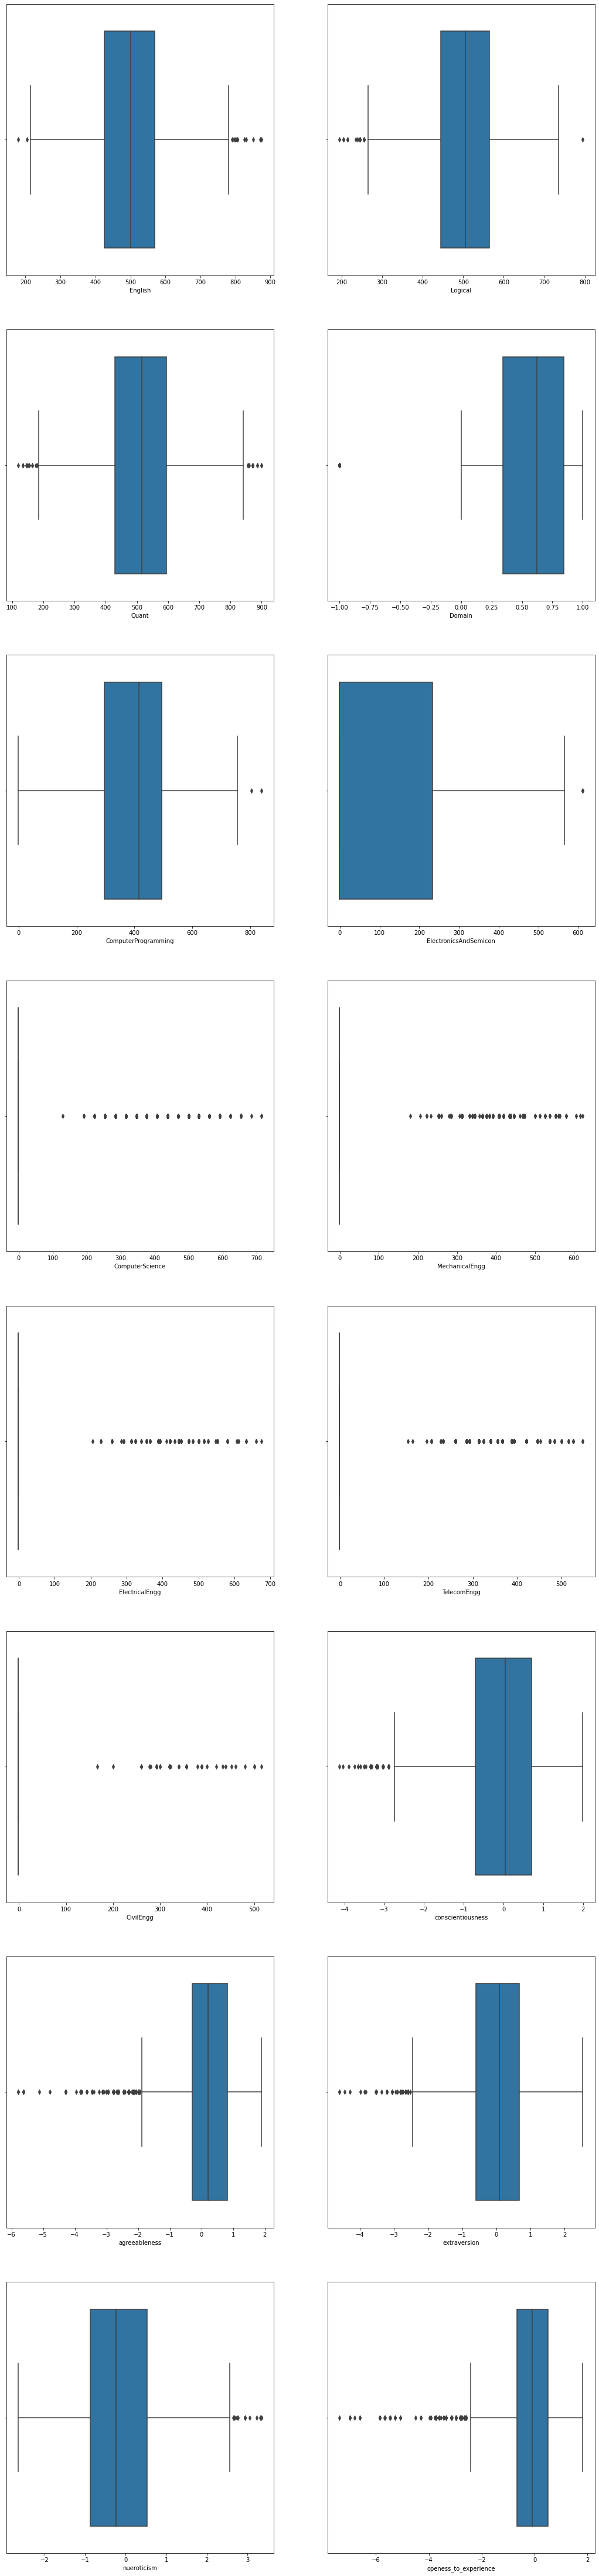

In [9]:
f, axes = plt.subplots(8, 2,figsize=(18,80))
j=0
k=0
for i in range(17,33):
   # sns.boxplot(x=df.iloc[:,i],orient='v' , ax=axes[j,k])

    if(i%2==0):
        k=1   
    elif(i%2!=0 and i>17):
        j=j+1
        k=0
    sns.boxplot(x=df.iloc[:,i],orient='v' , ax=axes[j,k])

In [10]:
df['English'][(df['English']< 220) | (df['English'] > 790)].reset_index()

,index,English
0,275,875
1,444,825
2,624,215
3,668,870
4,847,800
5,935,205
6,1183,805
7,1217,180
8,1450,830
9,1519,795


In [11]:
df['Logical'][(df['Logical']< 240) | (df['Logical'] > 790)].reset_index()

,index,Logical
0,133,205
1,345,215
2,628,215
3,1014,795
4,2830,195
5,3784,205
6,3876,235


In [12]:
df['Quant'][(df['Quant'] < 210) | (df['Quant'] > 840)].value_counts().reset_index()

,index,Quant
0,870,5
1,195,4
2,855,3
3,180,2
4,135,2
5,200,2
6,150,2
7,900,2
8,165,2
9,885,2


In [13]:
df['Domain'][df['Domain'] <= -1].value_counts().reset_index()

,index,Domain
0,-1.0,246


In [14]:
df['ComputerProgramming'][df['ComputerProgramming'] > 800].reset_index()

,index,ComputerProgramming
0,64,804
1,1711,840


In [15]:
df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon'] > 600].reset_index()

,index,ElectronicsAndSemicon
0,1557,612
1,3889,612


In [16]:
## Frequency Distribution of ComputerScience
df['ComputerScience'].value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

In [17]:
## Frequency Distribution of MechanicalEngg
df['MechanicalEngg'][df['MechanicalEngg'] > 160].value_counts().reset_index()

,index,MechanicalEngg
0,366,20
1,446,16
2,438,15
3,420,14
4,313,13
5,393,13
6,376,13
7,407,12
8,346,11
9,473,10


In [18]:
## Frequency Distribution of ElectricalEngg
df['ElectricalEngg'][df['ElectricalEngg'] > 200].value_counts().reset_index()

,index,ElectricalEngg
0,420,16
1,446,14
2,388,10
3,473,10
4,452,10
5,356,9
6,500,8
7,580,8
8,393,7
9,324,7


In [19]:
## Frequency Distribution of TelecomEngg
df['TelecomEngg'][df['TelecomEngg'] > 150].value_counts().reset_index()


,index,TelecomEngg
0,393,45
1,366,43
2,260,35
3,313,34
4,340,32
5,286,31
6,420,26
7,446,16
8,388,14
9,233,14


In [20]:
### Frequency Distribution of CivilEngg
df['CivilEngg'].value_counts()

-1      3956
 292       6
 356       6
 388       4
 260       3
 320       3
 300       2
 340       2
 500       2
 452       1
 277       1
 516       1
 480       1
 460       1
 166       1
 440       1
 420       1
 400       1
 200       1
 380       1
 322       1
 280       1
 433       1
Name: CivilEngg, dtype: int64

Text(0.5, 1.0, 'Total_amcat')

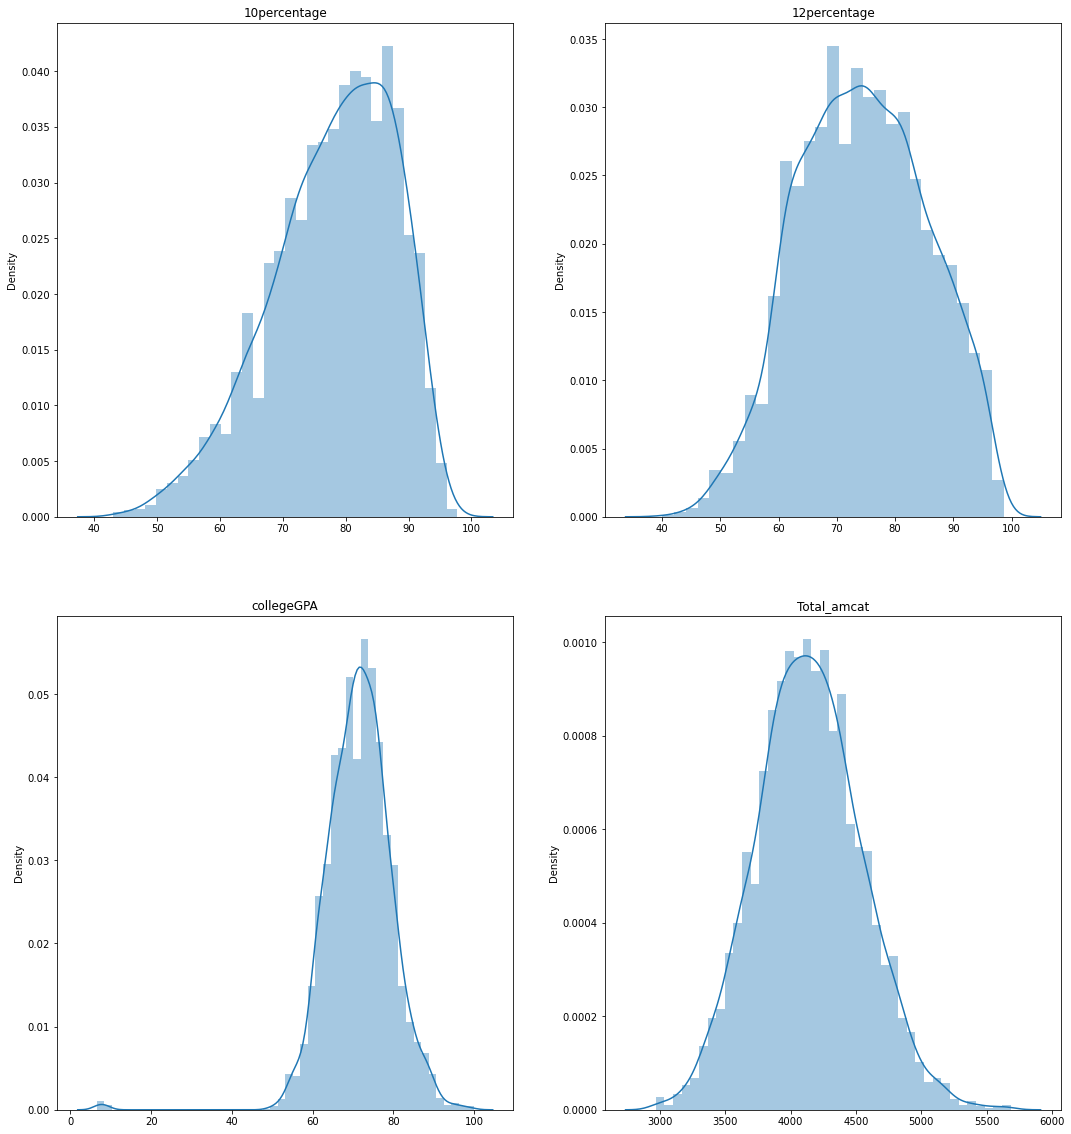

In [21]:
f, axes = plt.subplots(2, 2,figsize=(18,20))
df['Total_amcat']=df.iloc[:,17:].sum(axis=1)
sns.distplot(x=df['10percentage'] , ax=axes[0,0])
sns.distplot(x=df['12percentage'] , ax=axes[0,1])
sns.distplot(x=df['collegeGPA'] , ax=axes[1,0])
sns.distplot(x=df['Total_amcat'] , ax=axes[1,1])
axes[0,0].set_title("10percentage")
axes[0,1].set_title("12percentage")
axes[1,0].set_title("collegeGPA")
axes[1,1].set_title("Total_amcat")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1991'),
  Text(1, 0, '2004'),
  Text(2, 0, '2006'),
  Text(3, 0, '2007'),
  Text(4, 0, '2008'),
  Text(5, 0, '2009'),
  Text(6, 0, '2010'),
  Text(7, 0, '2011'),
  Text(8, 0, '2012'),
  Text(9, 0, '2013'),
  Text(10, 0, '2014'),
  Text(11, 0, '2015')])

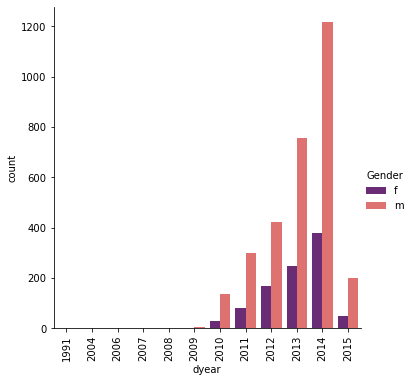

In [22]:
sns.catplot(x = "dyear",hue="Gender",data = df, palette = 'magma',kind='count')
plt.xticks(rotation=90)

In [23]:
def stamp(col):
    for i in range(len(df[col])):
        if(df[col][i]!='present'):
            df[col][i]=df[col][i].replace('0:00','').strip()

In [24]:
stamp("DOJ")
stamp("DOL")
stamp("DOB")

In [25]:
from scipy import stats
z = np.abs(stats.zscore(df.Salary))
#Adding Threshold to 3
threshold = 3
p=list(np.where(z > 3))

p # we have the indexes that contains the outliers

#So we will remove that rows so that our dataset contains outlier free
outlier=[df['Salary'][i] for i in p]

<AxesSubplot:xlabel='dyear', ylabel='Density'>

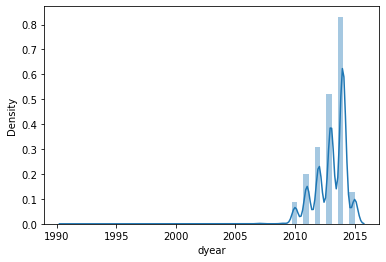

In [26]:

sns.distplot(df['dyear'])

<AxesSubplot:xlabel='collegeGPA'>

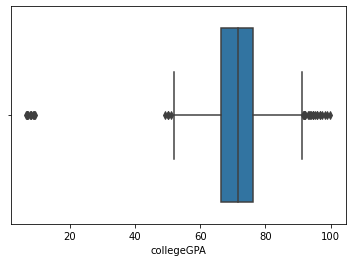

In [27]:

sns.boxplot(x=df['collegeGPA'],orient='v')

##### From above the plot we can clearly see that there are outliers which lies under 20

### Outliers for the CollegeGPA

In [28]:
df.collegeGPA[df['collegeGPA']<20].reset_index().drop(['index'],axis=1)

,collegeGPA
0,8.58
1,6.63
2,6.80
3,6.85
4,8.07
5,7.56
6,6.95
7,8.13
8,9.30
9,8.88


### Univariant Analysis of 10th and 12th marks

<AxesSubplot:xlabel='10percentage'>

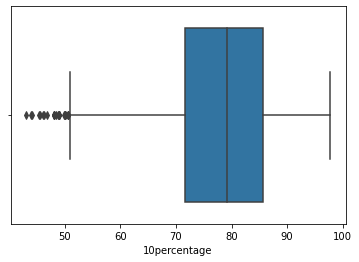

In [29]:
sns.boxplot(x=df['10percentage'],orient='v')

In [30]:
df['10percentage'][df['10percentage']<52].value_counts().reset_index()

,index,10percentage
0,50.00,6
1,49.00,5
2,48.00,4
3,51.00,3
4,50.60,2
5,48.50,1
6,51.36,1
7,51.83,1
8,48.80,1
9,44.16,1


<AxesSubplot:xlabel='12percentage'>

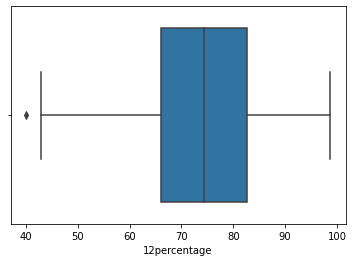

In [31]:
sns.boxplot(x=df['12percentage'],orient='v')

In [32]:
df['12percentage'][df['12percentage']<41].reset_index()

,index,12percentage
0,3337,40.0


In [33]:

df.groupby('Designation')['Salary'].mean()

Designation
.net developer                   223382.352941
.net web developer               196250.000000
account executive                287500.000000
account manager                  350000.000000
admin assistant                  102500.000000
                                     ...      
web designer and seo             200000.000000
web developer                    168981.481481
web intern                       205000.000000
website developer/tester         200000.000000
windows systems administrator    200000.000000
Name: Salary, Length: 419, dtype: float64

### Co-realtion Between our DataFrame Columns lies between -1 to +1; where +1 means strongly co-related

In [34]:
df.corr()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,dyear,Total_amcat
Salary,1.000000,0.177373,-0.161383,0.170254,-0.179332,0.130103,0.015384,-0.010053,0.178219,0.179275,...,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312,-0.213685,0.161556
10percentage,0.177373,1.000000,0.269957,0.643378,-0.126042,0.312538,0.116707,-0.013799,0.350780,0.316014,...,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692,0.062891,0.353492
12graduation,-0.161383,0.269957,1.000000,0.259166,0.027691,0.086001,-0.003016,0.014457,0.147925,0.105887,...,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069,0.693688,0.206692
12percentage,0.170254,0.643378,0.259166,1.000000,-0.100771,0.346137,0.130462,-0.012933,0.212888,0.243571,...,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332,0.023924,0.306902
CollegeTier,-0.179332,-0.126042,0.027691,-0.100771,1.000000,-0.086781,-0.101494,-0.005557,-0.183843,-0.182811,...,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179,0.030531,-0.220932
collegeGPA,0.130103,0.312538,0.086001,0.346137,-0.086781,1.000000,0.017471,0.008706,0.106478,0.196610,...,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071,0.042082,0.222007
CollegeCityTier,0.015384,0.116707,-0.003016,0.130462,-0.101494,0.017471,1.000000,0.008152,0.050462,0.020353,...,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790,-0.045007,0.063571
GraduationYear,-0.010053,-0.013799,0.014457,-0.012933,-0.005557,0.008706,0.008152,1.000000,-0.024089,-0.024018,...,0.008525,0.004226,0.001696,-0.013235,-0.002877,0.008397,-0.000417,0.016855,0.021269,-0.004651
English,0.178219,0.350780,0.147925,0.212888,-0.183843,0.106478,0.050462,-0.024089,1.000000,0.444357,...,0.032438,-0.005822,-0.007724,0.034943,0.194990,0.018755,-0.155528,0.067979,0.070859,0.572953
Logical,0.179275,0.316014,0.105887,0.243571,-0.182811,0.196610,0.020353,-0.024018,0.444357,1.000000,...,0.012003,-0.012947,-0.011286,0.025876,0.167207,-0.006949,-0.178781,0.048420,0.042728,0.589275


#### Filtering the Co-relation between columns using the threshold of 0.5

In [35]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[(so>0.5) & (so<1)]

Logical                Quant                    0.500152
Quant                  Logical                  0.500152
Total_amcat            English                  0.572953
English                Total_amcat              0.572953
Logical                Total_amcat              0.589275
Total_amcat            Logical                  0.589275
openess_to_experience  agreeableness            0.591541
agreeableness          openess_to_experience    0.591541
Total_amcat            Quant                    0.621570
Quant                  Total_amcat              0.621570
12percentage           10percentage             0.643378
10percentage           12percentage             0.643378
dyear                  12graduation             0.693688
12graduation           dyear                    0.693688
dtype: float64

<AxesSubplot:>

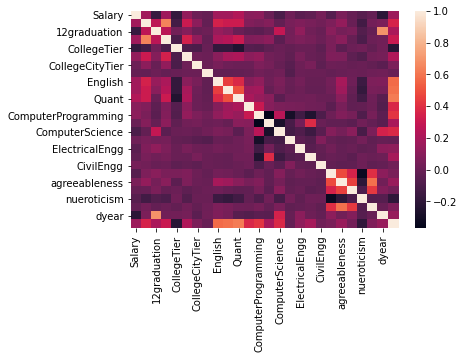

In [36]:
sns.heatmap(df.corr())

#### Scatter and Joint-plot of Highly Co-related Features

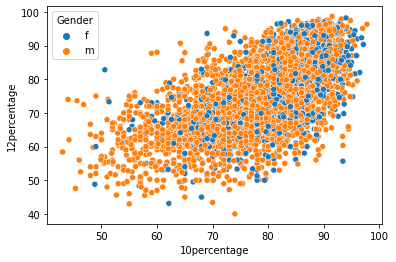

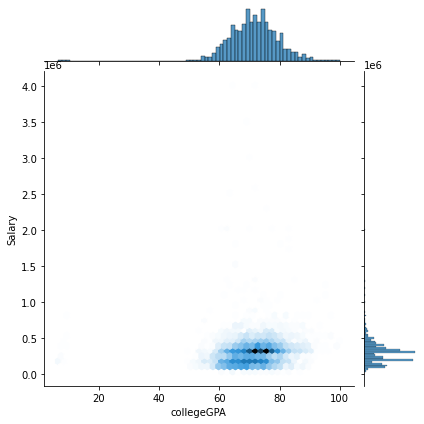

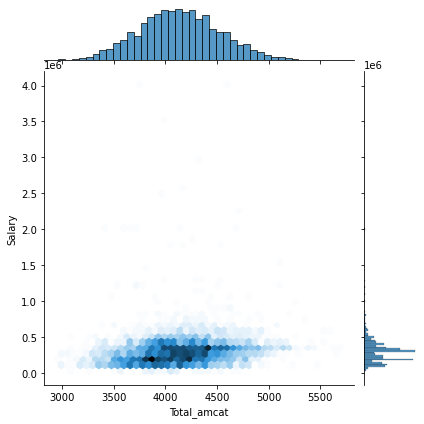

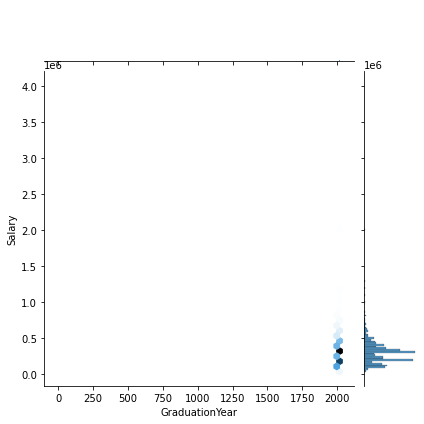

In [37]:
sns.scatterplot(data=df, x="10percentage", y="12percentage",hue="Gender")
sns.jointplot(data=df, x="collegeGPA", y="Salary", kind='hex')
sns.jointplot(data=df, x="Total_amcat", y="Salary", kind='hex')
sns.jointplot(data=df, x="GraduationYear", y="Salary", kind='hex')

In [38]:
df['dyear']=pd.DatetimeIndex(df['DOJ']).year

In [39]:

from sklearn import preprocessing

x =df[['Salary']] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df['n_sal']=df_normalized

#### Yearwise Salary of Employee During Joining Year

<AxesSubplot:xlabel='dyear', ylabel='n_sal'>

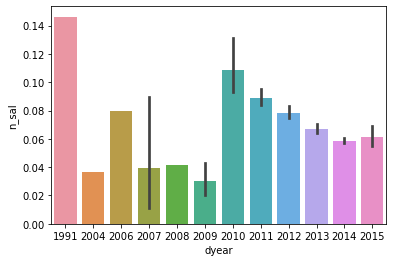

In [40]:
sns.barplot(x='dyear',y='n_sal',data=df)

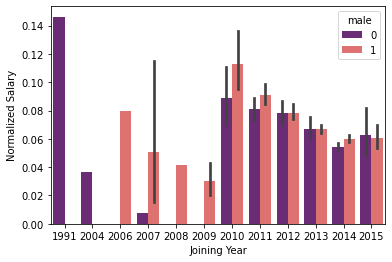

In [41]:
df['male']=pd.get_dummies(df.Gender,drop_first=True)
sns.barplot(x='dyear',y='n_sal',data=df,hue='male',palette = 'magma')
plt.xlabel("Joining Year")
plt.ylabel("Normalized Salary")
plt.show()
##From the above plot we can see that 1991 and 2004 there were no Male Employees in the Company :{)

In [42]:
df['dyear'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2006       1
2008       1
1991       1
Name: dyear, dtype: int64

In [44]:
import re
df['lyear']=0
for i in range(len(df['DOL'])):
    if(df['DOL'][i]=='present'):
        df['lyear'][i]=0
    else:
        d = re.findall('(\d{4})',df['DOL'][i])
        df['lyear'][i]=d[0]

In [45]:
df['lyear'].value_counts()

0       1875
2015    1059
2014     646
2013     255
2012     116
2011      40
2010       4
2008       1
2005       1
2009       1
Name: lyear, dtype: int64

### Joing vs Leaving the company Employees¶

In [46]:
print(df['dyear'].value_counts()-df['lyear'].value_counts())

0         NaN
1991      NaN
2004      NaN
2005      NaN
2006      NaN
2007      NaN
2008      0.0
2009      4.0
2010    162.0
2011    341.0
2012    474.0
2013    749.0
2014    950.0
2015   -811.0
dtype: float64


In [47]:
###From the Above stats we can see that the 2015 has a negative retation on the emlpoyee.But other years we can see that there more new Joinees than leaving employees in the company

### Yearwise Employees Resignation

In [48]:
k=df.lyear[df['lyear']!='0'].value_counts()
k

0       1875
2015    1059
2014     646
2013     255
2012     116
2011      40
2010       4
2008       1
2005       1
2009       1
Name: lyear, dtype: int64

### Plot of Date of Leaving Employees

Text(0, 0.5, 'No of Employee Left')

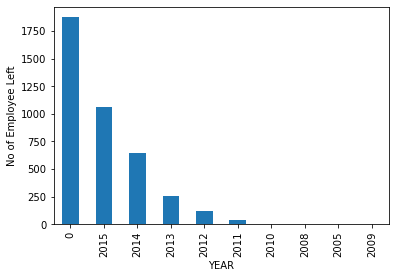

In [49]:
df.lyear[df['lyear']!='0'].value_counts().plot.bar()
plt.xlabel('YEAR')
plt.ylabel('No of Employee Left')

### Genderwise Employee who left the company

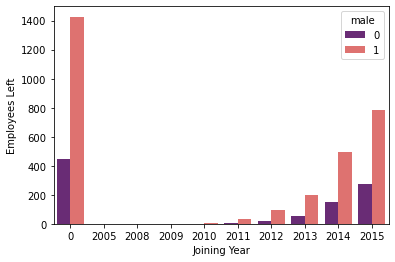

In [50]:
sns.countplot(x='lyear',data=df,hue='male',palette = 'magma',saturation=0.75,)
plt.xlabel("Joining Year")
plt.ylabel("Employees Left")
plt.show()

In [51]:
### From the Above plot we can see that there are more male employees are leaving the jobs than female,Don;t know why :(. But we can also that Females are doing great in the company because their leaving ratio is less than the male employees

### Hypothesis Testing

### Normalize Salary for Better Visualization

In [52]:
df['n_sal']=df['Salary']/100000

 
As the question describe itself that the employees should be fresher's so we have try to compare their graduation year with their joining year

In [53]:
df[['Designation','Specialization']][df['Designation']=='hardware engineer']

,Designation,Specialization
197,hardware engineer,electrical engineering
802,hardware engineer,electronics and communication engineering
839,hardware engineer,electronics and communication engineering
1886,hardware engineer,electronics and communication engineering
2070,hardware engineer,electronics and communication engineering
2533,hardware engineer,electronics and communication engineering
3438,hardware engineer,electronics engineering
3547,hardware engineer,electronics and communication engineering


In [54]:
print('Average Salary :')
print('Programmer Analyst :',round(df['n_sal'][(df['GraduationYear']==df['dyear']) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['n_sal'][(df['GraduationYear']==df['dyear']) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['n_sal'][(df['GraduationYear']==df['dyear']) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['n_sal'][(df['GraduationYear']==df['dyear']) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 3.16
Software Engineer : 3.6
Hardware Engineer : nan
Associate Engineer : 3.5


### Sample Data for Required Employees

In [55]:
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

### Necessary variables initialization ex- sample mean

In [56]:
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

In [57]:
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


## Calulating T-Score

In [58]:

def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

## Necessary variables initialization ex- sample mean,population mean

In [59]:

pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

#### Calling T-score Function

In [60]:
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


### Setting the Confidence Level

In [61]:
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


### Visualizing the Sampling Distribution with Rejection Regions

t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

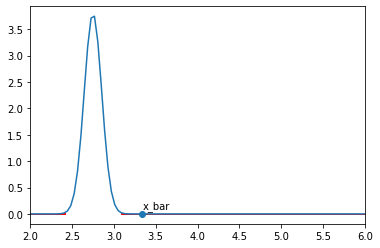

In [62]:
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

### Compairing the Table Value and T-score value

In [63]:
if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


#### Conclusion using p-test

In [64]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis
